# 1. Introduction
The purpose of this exploratory data analysis is to understand the structure, quality, and key characteristics of the datasets used in this project. The insights derived here will guide feature selection and model design for the investment recommendation and growth prediction components.

# 2. Importing libraries

In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
sns.set_theme(
    style="white",
    context="notebook",
    font_scale=1.1
)

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

## 2. Loading the Dataset
In this section, both datasets are loaded and inspected to understand their size, available features, and data types. I used the [Stock Market Indicators](https://www.kaggle.com/datasets/khushikyad001/finance-and-economics-dataset-2000-present) and [Investor Behaviour](https://www.kaggle.com/datasets/ankityadav005/financial-trends-and-behaviour) datasets which are available on Kaggle.


In [2]:
df_market = pd.read_csv(r"C:\Users\SHANKHY\OneDrive\Desktop\finance_economics_dataset.csv")
df_market.head(2)

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101


In [3]:
df_users = pd.read_csv(r"C:\Users\SHANKHY\OneDrive\Desktop\Finance_Trends.csv")
df_users.head(2)

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Male,29,Yes,2,4,7,5,3,1,6,...,Less than 1 year,Weekly,20%-30%,Public Provident Fund,Health Care,Dividend,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines
1,Male,28,Yes,2,3,6,5,1,4,7,...,Less than 1 year,Weekly,30%-40%,Public Provident Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Television


# 3. Data Cleaning
Before proceeding with analysis, the datasets are examined for missing values and potential data quality issues. Understanding data completeness ensures reliable downstream modeling.


In [7]:
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   3000 non-null   object 
 1   Stock Index                            3000 non-null   object 
 2   Open Price                             3000 non-null   float64
 3   Close Price                            3000 non-null   float64
 4   Daily High                             3000 non-null   float64
 5   Daily Low                              3000 non-null   float64
 6   Trading Volume                         3000 non-null   int64  
 7   GDP Growth (%)                         3000 non-null   float64
 8   Inflation Rate (%)                     3000 non-null   float64
 9   Unemployment Rate (%)                  3000 non-null   float64
 10  Interest Rate (%)                      3000 non-null   float64
 11  Cons

In [19]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             12000 non-null  object
 1   age                                12000 non-null  int64 
 2   Investment_Avenues                 12000 non-null  object
 3   Mutual_Funds                       12000 non-null  int64 
 4   Equity_Market                      12000 non-null  int64 
 5   Debentures                         12000 non-null  int64 
 6   Government_Bonds                   12000 non-null  int64 
 7   Fixed_Deposits                     12000 non-null  int64 
 8   PPF                                12000 non-null  int64 
 9   Gold                               12000 non-null  int64 
 10  Stock_Marktet                      12000 non-null  object
 11  Factor                             12000 non-null  object
 12  Obje

In [5]:
df_market.isnull().sum()

Date                                     0
Stock Index                              0
Open Price                               0
Close Price                              0
Daily High                               0
Daily Low                                0
Trading Volume                           0
GDP Growth (%)                           0
Inflation Rate (%)                       0
Unemployment Rate (%)                    0
Interest Rate (%)                        0
Consumer Confidence Index                0
Government Debt (Billion USD)            0
Corporate Profits (Billion USD)          0
Forex USD/EUR                            0
Forex USD/JPY                            0
Crude Oil Price (USD per Barrel)         0
Gold Price (USD per Ounce)               0
Real Estate Index                        0
Retail Sales (Billion USD)               0
Bankruptcy Rate (%)                      0
Mergers & Acquisitions Deals             0
Venture Capital Funding (Billion USD)    0
Consumer Sp

In [ ]:
df_users.isnull().sum()

gender                               0
age                                  0
Investment_Avenues                   0
Mutual_Funds                         0
Equity_Market                        0
Debentures                           0
Government_Bonds                     0
Fixed_Deposits                       0
PPF                                  0
Gold                                 0
Stock_Marktet                        0
Factor                               0
Objective                            0
Purpose                              0
Duration                             0
Invest_Monitor                       0
Expect                               0
Avenue                               0
What are your savings objectives?    0
Reason_Equity                        0
Reason_Mutual                        0
Reason_Bonds                         0
Reason_FD                            0
Source                               0
dtype: int64

## 4. Market Dataset Analysis (Growth Prediction)

### 4.1 Temporal Structure

The market dataset contains time-dependent information. This section ensures that the date column is correctly formatted and that the data is sorted chronologically, which is essential for time-series analysis.

In [9]:
df_market['Date'] = pd.to_datetime(df_market['Date'])
df_market = df_market.sort_values('Date')

### 4.2 Target Variable Exploration

The stock closing price is explored as the primary target variable for growth prediction. Visualizing its behavior over time provides insight into trends and volatility.

In [28]:
def clean_axes(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(False)

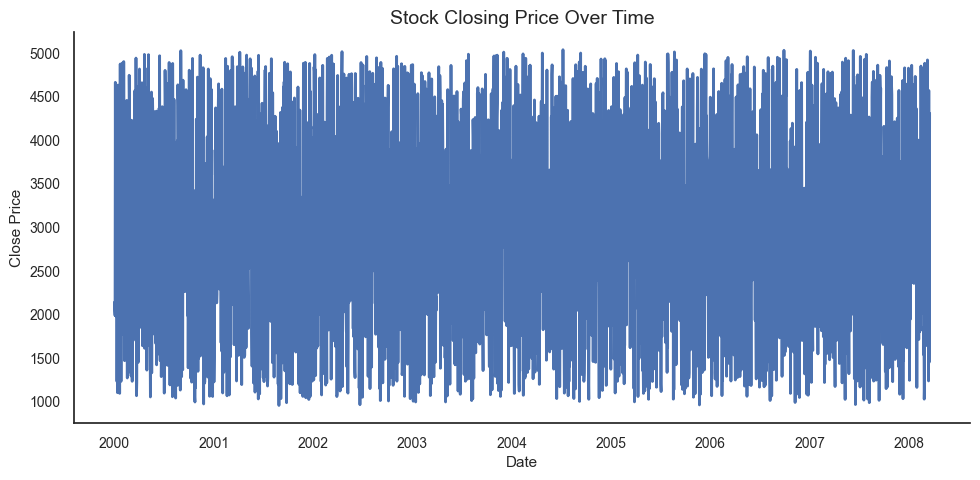

In [29]:
fig, ax = plt.subplots()

sns.lineplot(
    x=df_market['Date'],
    y=df_market['Close Price'],
    linewidth=2,
    ax=ax
)

ax.set_title("Stock Closing Price Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Close Price")

clean_axes(ax)
plt.tight_layout()
plt.show()

### 4.3 Feature Relationships

This section examines relationships between market indicators and macroeconomic variables using correlation analysis. The results help identify influential features for the prediction model.

corr = df_market.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Matrix of Market Indicators")
plt.show()

## 5. User Investment Dataset Analysis (Recommendation)

### 5.1 Demographic Distribution

The age distribution of users is analyzed to understand the dominant investor profiles represented in the dataset.

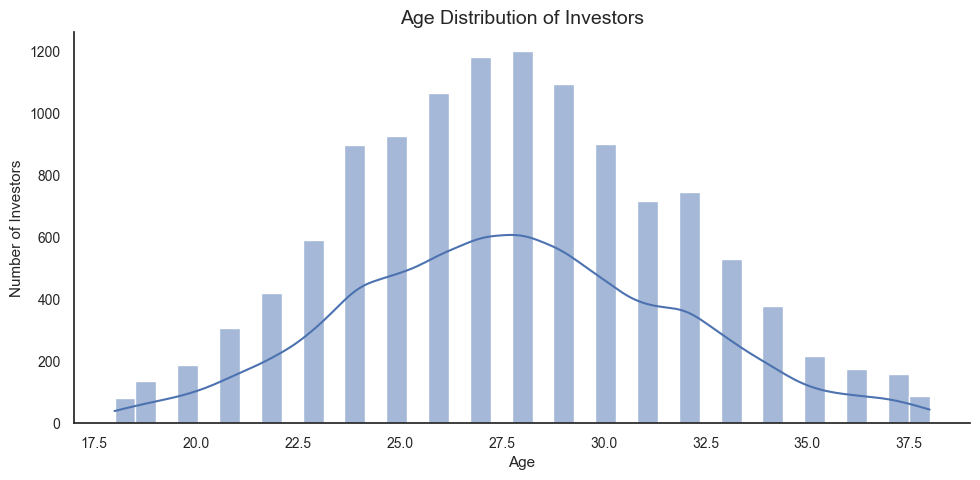

In [40]:
fig, ax = plt.subplots()

sns.histplot(df_users['age'], kde=True, ax=ax)

ax.set_title("Age Distribution of Investors")
ax.set_xlabel("Age")
ax.set_ylabel("Number of Investors")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(False)

plt.tight_layout()
plt.show()


### 5.2 Investment Preference Patterns

Investment preferences across different asset classes are examined to identify common behavioral patterns that can support user clustering and recommendation.

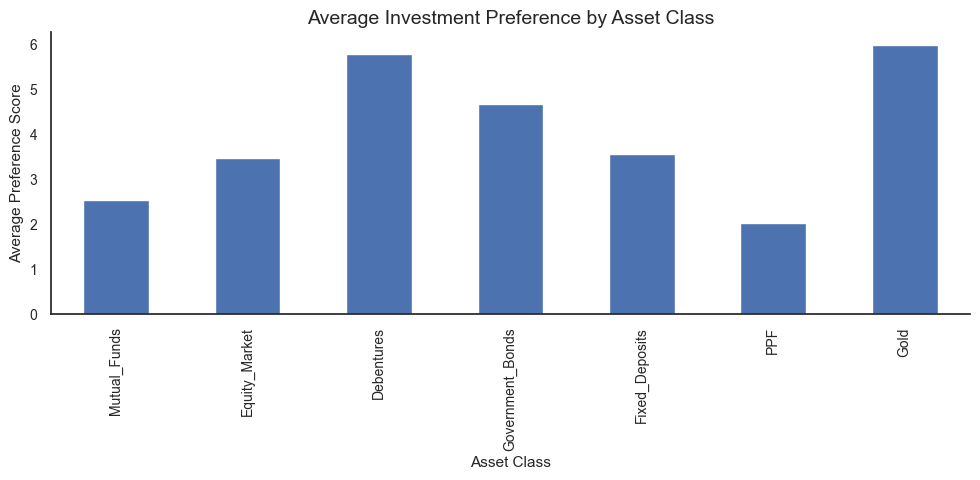

In [41]:
avg_prefs = df_users[investment_cols].mean()

fig, ax = plt.subplots()

avg_prefs.plot(kind='bar', ax=ax)

ax.set_title("Average Investment Preference by Asset Class")
ax.set_xlabel("Asset Class")
ax.set_ylabel("Average Preference Score")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(False)

plt.tight_layout()
plt.show()


### 5.3 Investment Horizon and Expectations

This section explores user investment durations to better understand goal-oriented behavior and time horizons.

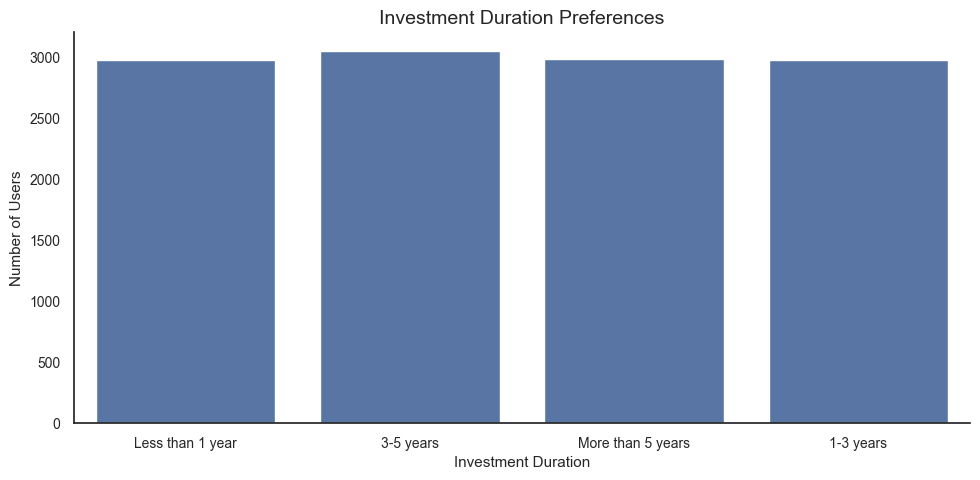

In [42]:
fig, ax = plt.subplots()

sns.countplot(data=df_users, x='Duration', ax=ax)

ax.set_title("Investment Duration Preferences")
ax.set_xlabel("Investment Duration")
ax.set_ylabel("Number of Users")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(False)

plt.tight_layout()
plt.show()

## 6. Key Insights from EDA

The exploratory analysis highlights several important observations:

- The datasets are suitable for both recommendation and prediction tasks  
- Users exhibit distinct investment preference patterns across asset classes  
- Market indicators show meaningful relationships with stock price movements  
- The temporal structure supports forecasting-based modeling  

These insights directly inform the modeling decisions in subsequent notebooks.

## 7. Prepared Data for Modeling

Cleaned versions of the datasets are saved for use in later modeling stages, ensuring a consistent and reproducible workflow.

In [23]:
os.makedirs("data", exist_ok=True)

df_market.to_csv("data/market_cleaned.csv", index=False)
df_users.to_csv("data/users_cleaned.csv", index=False)